In [66]:
from matplotlib import rc
import matplotlib.font_manager as fm
#fm._rebuild()
fm.get_fontconfig_fonts()

font_location = './NanumGothic.ttf'

font_name = fm.FontProperties(fname = font_location).get_name()
rc('font',family=font_name)

In [67]:
import pandas as pd

In [68]:
subway = pd.read_csv('data2/seoul_subway.csv')

In [4]:
subway_sub = subway.loc[(subway['노선명']=='1호선')&
                        (subway['역명']=='종로3가'),:]

subway_sub.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
1,20191201,1호선,종로3가,19646,17772,20191204
593,20191202,1호선,종로3가,34277,32405,20191205
1184,20191203,1호선,종로3가,34957,32832,20191206
1776,20191204,1호선,종로3가,36007,33498,20191207
2426,20191205,1호선,종로3가,35536,33702,20191208


In [5]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216870 entries, 0 to 216869
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   사용일자    216870 non-null  int64 
 1   노선명     216870 non-null  object
 2   역명      216870 non-null  object
 3   승차총승객수  216870 non-null  int64 
 4   하차총승객수  216870 non-null  int64 
 5   등록일자    216870 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 9.9+ MB


In [6]:
#단순 이동 평균
subway_sub['MA_5']= subway_sub.loc[:,'승차총승객수'].rolling(window=5).mean()#5일 이동 평균

C:\Users\asd\AppData\Local\Temp/ipykernel_25212/1736247898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subway_sub['MA_5']= subway_sub.loc[:,'승차총승객수'].rolling(window=5).mean()#5일 이동 평균


In [7]:
subway_sub

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,MA_5
1,20191201,1호선,종로3가,19646,17772,20191204,NaN
593,20191202,1호선,종로3가,34277,32405,20191205,NaN
1184,20191203,1호선,종로3가,34957,32832,20191206,NaN
1776,20191204,1호선,종로3가,36007,33498,20191207,NaN
2426,20191205,1호선,종로3가,35536,33702,20191208,32084.6
...,...,...,...,...,...,...,...
214078,20201126,1호선,종로3가,22732,20713,20201129,20598.8
215074,20201127,1호선,종로3가,22295,20639,20201130,22831.8
215172,20201128,1호선,종로3가,15104,14240,20201201,21208.4
216253,20201129,1호선,종로3가,8974,8215,20201202,18526.0


In [8]:
subway_sub['EWMA_01']= subway_sub.loc[:,'승차총승객수'].ewm(alpha=0.9).mean()

C:\Users\asd\AppData\Local\Temp/ipykernel_25212/3321275169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subway_sub['EWMA_01']= subway_sub.loc[:,'승차총승객수'].ewm(alpha=0.9).mean()


In [9]:
subway_sub['EWMA_01']

1         19646.000000
593       32946.909091
1184      34757.801802
1776      35882.192619
2426      35570.616146
              ...     
214078    22799.622516
215074    22345.462252
215172    15828.146225
216253     9659.414623
216387    20131.441462
Name: EWMA_01, Length: 366, dtype: float64

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [62]:
subway = subway.set_index('사용일자')

KeyError: "None of ['사용일자'] are in the columns"

In [12]:
subway

,노선명,역명,승차총승객수,하차총승객수,등록일자
사용일자,,,,,
20191201,1호선,종각,19093,17141,20191204
20191201,1호선,종로3가,19646,17772,20191204
20191201,1호선,종로5가,13716,13149,20191204
20191201,1호선,동대문,11040,13079,20191204
20191201,1호선,신설동,8498,8322,20191204
...,...,...,...,...,...
20201130,공항철도 1호선,검암,6292,6142,20201203
20201130,공항철도 1호선,청라국제도시,5772,5315,20201203
20201130,공항철도 1호선,운서,5174,5129,20201203


In [13]:
subway_sub= subway.loc[(subway['노선명']=='1호선')&
               (subway['역명']=='종각'),:]

In [14]:
subway_sub = subway_sub.reset_index()

In [15]:
subway_sub['사용일자'] = pd.to_datetime(subway_sub['사용일자'],format='%Y%m%d')

In [16]:
subway_sub['사용일자']

0     2019-12-01
1     2019-12-02
2     2019-12-03
3     2019-12-04
4     2019-12-05
         ...    
361   2020-11-26
362   2020-11-27
363   2020-11-28
364   2020-11-29
365   2020-11-30
Name: 사용일자, Length: 366, dtype: datetime64[ns]

In [17]:
subway_sub.set_index('사용일자',inplace=True)

In [60]:
subway_sub.index

Int64Index([   439,   1030,   1621,   2214,   2863,   3397,   4044,   4579,
              5170,   5763,
            ...
            211235, 211881, 212554, 212883, 213528, 214412, 214887, 215582,
            216071, 216590],
           dtype='int64', length=366)

In [59]:
subway_sub.tail

<bound method NDFrame.tail of             사용일자  노선명   역명  승차총승객수  하차총승객수      등록일자
439     20191201  6호선  이태원   15817   12541  20191204
1030    20191202  6호선  이태원   12771   12974  20191205
1621    20191203  6호선  이태원   12871   13565  20191206
2214    20191204  6호선  이태원   13424   14227  20191207
2863    20191205  6호선  이태원   13478   14757  20191208
...          ...  ...  ...     ...     ...       ...
214412  20201126  6호선  이태원    7641    7780  20201129
214887  20201127  6호선  이태원    8140    8537  20201130
215582  20201128  6호선  이태원    6392    6513  20201201
216071  20201129  6호선  이태원    5239    4996  20201202
216590  20201130  6호선  이태원    7059    7109  20201203

[366 rows x 6 columns]>

In [20]:
result =seasonal_decompose(subway_sub['승차총승객수'][:200])

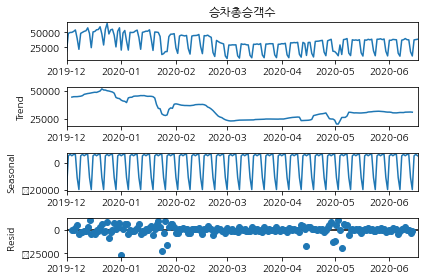

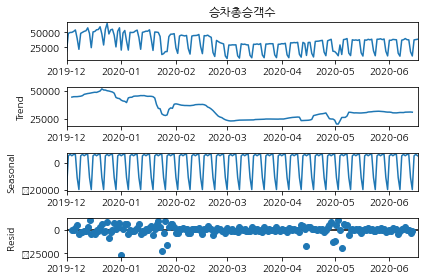

In [25]:
result.plot()

In [27]:
result.seasonal

사용일자
2019-12-01   -19583.003644
2019-12-02     5471.865592
2019-12-03     6498.331201
2019-12-04     5479.282070
2019-12-05     6421.940233
                  ...     
2020-06-13   -10709.120991
2020-06-14   -19583.003644
2020-06-15     5471.865592
2020-06-16     6498.331201
2020-06-17     5479.282070
Name: seasonal, Length: 200, dtype: float64

In [27]:
subway_sub=subway.loc[(subway['노선명']=='6호선')&
                     (subway['역명']=='이태원'),:]

In [35]:
result= subway_sub['하차총승객수'].ewm(alpha=0.9).mean()

In [38]:
subway_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 439 to 216590
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    366 non-null    int64 
 1   노선명     366 non-null    object
 2   역명      366 non-null    object
 3   승차총승객수  366 non-null    int64 
 4   하차총승객수  366 non-null    int64 
 5   등록일자    366 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 28.1+ KB


In [39]:
subway_sub

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
439,20191201,6호선,이태원,15817,12541,20191204
1030,20191202,6호선,이태원,12771,12974,20191205
1621,20191203,6호선,이태원,12871,13565,20191206
2214,20191204,6호선,이태원,13424,14227,20191207
2863,20191205,6호선,이태원,13478,14757,20191208
...,...,...,...,...,...,...
214412,20201126,6호선,이태원,7641,7780,20201129
214887,20201127,6호선,이태원,8140,8537,20201130
215582,20201128,6호선,이태원,6392,6513,20201201
216071,20201129,6호선,이태원,5239,4996,20201202


문제 3. 신사역 승차 총 승객수를 활용하여 시계열 분해 가법 모형을 실시하였을 때 2020년 11월 30일의 추세값은? 

In [40]:
subway

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093,17141,20191204
1,20191201,1호선,종로3가,19646,17772,20191204
2,20191201,1호선,종로5가,13716,13149,20191204
3,20191201,1호선,동대문,11040,13079,20191204
4,20191201,1호선,신설동,8498,8322,20191204
...,...,...,...,...,...,...
216865,20201130,공항철도 1호선,검암,6292,6142,20201203
216866,20201130,공항철도 1호선,청라국제도시,5772,5315,20201203
216867,20201130,공항철도 1호선,운서,5174,5129,20201203
216868,20201130,공항철도 1호선,공항화물청사,2148,2384,20201203


In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [70]:
subway['사용일자']=pd.to_datetime(subway['사용일자'],format='%Y%m%d')

In [71]:
subway = subway.set_index('사용일자')

In [79]:
subway_sub = subway.loc[(subway['역명']=='신사')&
                        (subway['노선명']=='3호선'),:]

In [90]:
result= seasonal_decompose(subway_sub['승차총승객수'],model='additive',extrapolate_trend=1)

In [91]:
result.trend['2020-11-30']

21098.571428571653